In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading train dataset
df_train = pd.read_csv('train.csv')
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
# loading test dataset
df_test = pd.read_csv('test.csv')
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [6]:
df_test = df_test.drop('id',axis =1)
df_test

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


## first we perform EDA on dataset

In [7]:
(df_train['churn'] == 'no').value_counts()

True     3652
False     598
Name: churn, dtype: int64

### there are no missing values in this data set.

### now we detect and treat outliers.

In [8]:
# Outlier detection
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
df_test.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


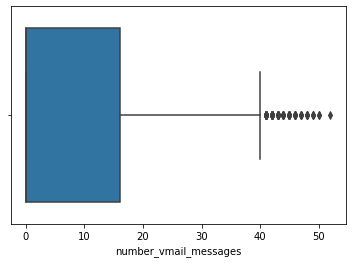

In [10]:
sns.boxplot(data=df_train,x = df_train['number_vmail_messages'])
plt.show()

In [11]:
Q1 = np.percentile(df_train['number_vmail_messages'],25)
Q3 = np.percentile(df_train['number_vmail_messages'],75)
IQR = Q3-Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
df_train['number_vmail_messages'] = df_train['number_vmail_messages'].apply(lambda x : x if x < upper_fence else upper_fence)

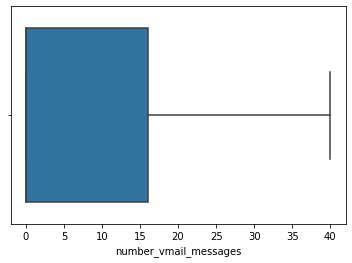

In [12]:
sns.boxplot(data=df_train,x = df_train['number_vmail_messages'])
plt.show()

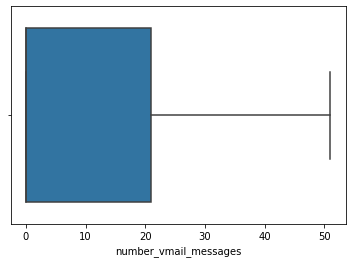

In [13]:
sns.boxplot(data=df_test,x = df_test['number_vmail_messages'])
plt.show()

<AxesSubplot:>

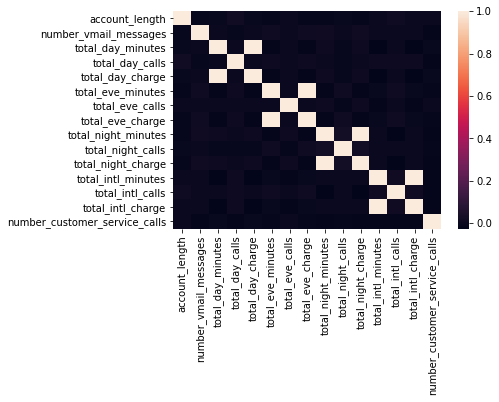

In [14]:
# find correlation between features of training set
sns.heatmap(df_train.corr())

In [15]:
df_train.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis=1,inplace=True)

<AxesSubplot:>

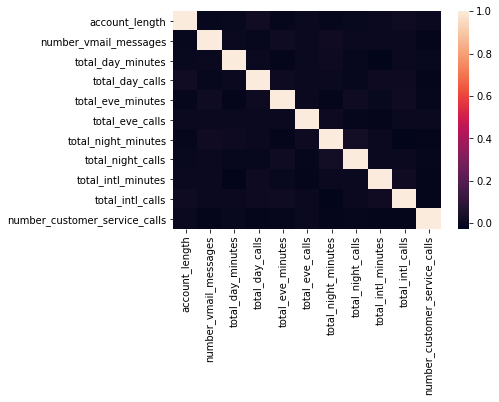

In [16]:
sns.heatmap(df_train.corr())

<AxesSubplot:>

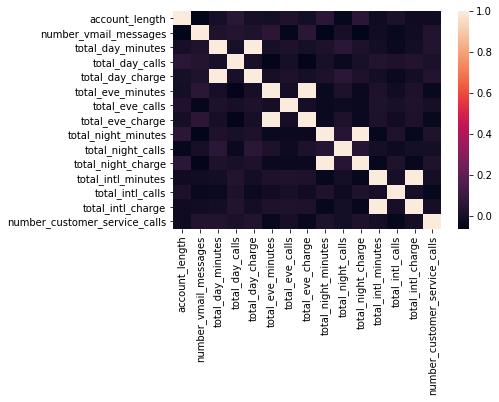

In [17]:
# find correlation between features of testing set
sns.heatmap(df_test.corr())

In [18]:
df_test.drop(['total_day_charge','total_eve_charge','total_night_charge','total_intl_charge'],axis=1,inplace=True)

<AxesSubplot:>

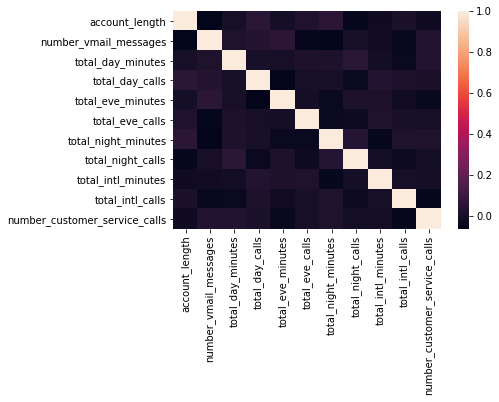

In [19]:
sns.heatmap(df_test.corr())

In [20]:
# for i in df_train.columns.tolist():
#     sns.distplot(df_train[i])
#     plt.show()

## Encoding categorical features

In [21]:
df_train['state'].value_counts().count()

51

In [22]:
df_train.shape

(4250, 16)

In [23]:
# encoding state column
state_df = pd.get_dummies(df_train['state'],drop_first=True)
df_train = pd.concat([df_train,state_df],axis = 1)
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,OH,107,area_code_415,no,yes,26.0,161.6,123,195.5,103,...,0,0,0,0,0,0,0,0,0,0
1,NJ,137,area_code_415,no,no,0.0,243.4,114,121.2,110,...,0,0,0,0,0,0,0,0,0,0
2,OH,84,area_code_408,yes,no,0.0,299.4,71,61.9,88,...,0,0,0,0,0,0,0,0,0,0
3,OK,75,area_code_415,yes,no,0.0,166.7,113,148.3,122,...,0,0,0,0,0,0,0,0,0,0
4,MA,121,area_code_510,no,yes,24.0,218.2,88,348.5,108,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0.0,188.3,70,243.8,88,...,0,0,0,0,0,0,0,0,0,0
4246,WV,73,area_code_408,no,no,0.0,177.9,89,131.2,82,...,0,0,0,0,0,0,0,0,1,0
4247,NC,75,area_code_408,no,no,0.0,170.7,101,193.1,126,...,0,0,0,0,0,0,0,0,0,0
4248,HI,50,area_code_408,no,yes,40.0,235.7,127,223.0,126,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_train = df_train.drop('state',axis = 1)
df_train

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,107,area_code_415,no,yes,26.0,161.6,123,195.5,103,254.4,...,0,0,0,0,0,0,0,0,0,0
1,137,area_code_415,no,no,0.0,243.4,114,121.2,110,162.6,...,0,0,0,0,0,0,0,0,0,0
2,84,area_code_408,yes,no,0.0,299.4,71,61.9,88,196.9,...,0,0,0,0,0,0,0,0,0,0
3,75,area_code_415,yes,no,0.0,166.7,113,148.3,122,186.9,...,0,0,0,0,0,0,0,0,0,0
4,121,area_code_510,no,yes,24.0,218.2,88,348.5,108,212.6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,area_code_415,no,no,0.0,188.3,70,243.8,88,213.7,...,0,0,0,0,0,0,0,0,0,0
4246,73,area_code_408,no,no,0.0,177.9,89,131.2,82,186.2,...,0,0,0,0,0,0,0,0,1,0
4247,75,area_code_408,no,no,0.0,170.7,101,193.1,126,129.1,...,0,0,0,0,0,0,0,0,0,0
4248,50,area_code_408,no,yes,40.0,235.7,127,223.0,126,297.5,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# encoding area_code column 
df_train['area_code'].value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [26]:
areacode_df = pd.get_dummies(df_train['area_code'],drop_first=True)
df_train = pd.concat([df_train,areacode_df],axis = 1)
df_train

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
0,107,area_code_415,no,yes,26.0,161.6,123,195.5,103,254.4,...,0,0,0,0,0,0,0,0,1,0
1,137,area_code_415,no,no,0.0,243.4,114,121.2,110,162.6,...,0,0,0,0,0,0,0,0,1,0
2,84,area_code_408,yes,no,0.0,299.4,71,61.9,88,196.9,...,0,0,0,0,0,0,0,0,0,0
3,75,area_code_415,yes,no,0.0,166.7,113,148.3,122,186.9,...,0,0,0,0,0,0,0,0,1,0
4,121,area_code_510,no,yes,24.0,218.2,88,348.5,108,212.6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,area_code_415,no,no,0.0,188.3,70,243.8,88,213.7,...,0,0,0,0,0,0,0,0,1,0
4246,73,area_code_408,no,no,0.0,177.9,89,131.2,82,186.2,...,0,0,0,0,0,0,1,0,0,0
4247,75,area_code_408,no,no,0.0,170.7,101,193.1,126,129.1,...,0,0,0,0,0,0,0,0,0,0
4248,50,area_code_408,no,yes,40.0,235.7,127,223.0,126,297.5,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_train = df_train.drop('area_code',axis = 1)
df_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
0,107,no,yes,26.0,161.6,123,195.5,103,254.4,103,...,0,0,0,0,0,0,0,0,1,0
1,137,no,no,0.0,243.4,114,121.2,110,162.6,104,...,0,0,0,0,0,0,0,0,1,0
2,84,yes,no,0.0,299.4,71,61.9,88,196.9,89,...,0,0,0,0,0,0,0,0,0,0
3,75,yes,no,0.0,166.7,113,148.3,122,186.9,121,...,0,0,0,0,0,0,0,0,1,0
4,121,no,yes,24.0,218.2,88,348.5,108,212.6,118,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,no,no,0.0,188.3,70,243.8,88,213.7,79,...,0,0,0,0,0,0,0,0,1,0
4246,73,no,no,0.0,177.9,89,131.2,82,186.2,89,...,0,0,0,0,0,0,1,0,0,0
4247,75,no,no,0.0,170.7,101,193.1,126,129.1,104,...,0,0,0,0,0,0,0,0,0,0
4248,50,no,yes,40.0,235.7,127,223.0,126,297.5,116,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# encoding international_plan column
df_train['international_plan'] = df_train['international_plan'].map({'yes':1,'no':0})
df_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
0,107,0,yes,26.0,161.6,123,195.5,103,254.4,103,...,0,0,0,0,0,0,0,0,1,0
1,137,0,no,0.0,243.4,114,121.2,110,162.6,104,...,0,0,0,0,0,0,0,0,1,0
2,84,1,no,0.0,299.4,71,61.9,88,196.9,89,...,0,0,0,0,0,0,0,0,0,0
3,75,1,no,0.0,166.7,113,148.3,122,186.9,121,...,0,0,0,0,0,0,0,0,1,0
4,121,0,yes,24.0,218.2,88,348.5,108,212.6,118,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,no,0.0,188.3,70,243.8,88,213.7,79,...,0,0,0,0,0,0,0,0,1,0
4246,73,0,no,0.0,177.9,89,131.2,82,186.2,89,...,0,0,0,0,0,0,1,0,0,0
4247,75,0,no,0.0,170.7,101,193.1,126,129.1,104,...,0,0,0,0,0,0,0,0,0,0
4248,50,0,yes,40.0,235.7,127,223.0,126,297.5,116,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Encoding voice_mail_plan column
df_train['voice_mail_plan'] = df_train['voice_mail_plan'].map({'yes':1,'no':0})
df_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
0,107,0,1,26.0,161.6,123,195.5,103,254.4,103,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0.0,243.4,114,121.2,110,162.6,104,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0.0,299.4,71,61.9,88,196.9,89,...,0,0,0,0,0,0,0,0,0,0
3,75,1,0,0.0,166.7,113,148.3,122,186.9,121,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24.0,218.2,88,348.5,108,212.6,118,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0.0,188.3,70,243.8,88,213.7,79,...,0,0,0,0,0,0,0,0,1,0
4246,73,0,0,0.0,177.9,89,131.2,82,186.2,89,...,0,0,0,0,0,0,1,0,0,0
4247,75,0,0,0.0,170.7,101,193.1,126,129.1,104,...,0,0,0,0,0,0,0,0,0,0
4248,50,0,1,40.0,235.7,127,223.0,126,297.5,116,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Encoding churn column
df_train['churn'] = df_train['churn'].map({'yes':1,'no':0})
df_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
0,107,0,1,26.0,161.6,123,195.5,103,254.4,103,...,0,0,0,0,0,0,0,0,1,0
1,137,0,0,0.0,243.4,114,121.2,110,162.6,104,...,0,0,0,0,0,0,0,0,1,0
2,84,1,0,0.0,299.4,71,61.9,88,196.9,89,...,0,0,0,0,0,0,0,0,0,0
3,75,1,0,0.0,166.7,113,148.3,122,186.9,121,...,0,0,0,0,0,0,0,0,1,0
4,121,0,1,24.0,218.2,88,348.5,108,212.6,118,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0.0,188.3,70,243.8,88,213.7,79,...,0,0,0,0,0,0,0,0,1,0
4246,73,0,0,0.0,177.9,89,131.2,82,186.2,89,...,0,0,0,0,0,0,1,0,0,0
4247,75,0,0,0.0,170.7,101,193.1,126,129.1,104,...,0,0,0,0,0,0,0,0,0,0
4248,50,0,1,40.0,235.7,127,223.0,126,297.5,116,...,0,0,0,0,0,0,0,0,0,0


### encoding test data

In [31]:
# for test data
state_df_test = pd.get_dummies(df_test['state'],drop_first=True)
df_test = pd.concat([df_test,state_df_test],axis = 1)
df_test = df_test.drop('state',axis = 1)
df_test

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,128,area_code_415,no,yes,25,265.1,110,197.4,99,244.7,...,0,0,0,0,0,0,0,0,0,0
1,118,area_code_510,yes,no,0,223.4,98,220.6,101,203.9,...,0,0,0,0,0,0,0,0,0,0
2,62,area_code_415,no,no,0,120.7,70,307.2,76,203.0,...,0,0,0,0,0,0,0,0,0,0
3,93,area_code_510,no,no,0,190.7,114,218.2,111,129.6,...,0,0,0,0,0,1,0,0,0,0
4,174,area_code_415,no,no,0,124.3,76,277.1,112,250.7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,area_code_415,no,no,0,119.4,99,226.3,97,202.7,...,0,0,0,0,0,0,0,0,0,0
746,73,area_code_408,no,no,0,177.2,118,270.5,84,241.8,...,0,0,0,0,0,0,1,0,0,0
747,152,area_code_415,no,no,0,184.2,90,256.8,73,213.6,...,0,0,0,0,0,0,0,0,1,0
748,61,area_code_415,no,no,0,140.6,89,172.8,128,212.4,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# area code
areacode_dft = pd.get_dummies(df_test['area_code'],drop_first=True)
df_test = pd.concat([df_test,areacode_dft],axis = 1)
df_test = df_test.drop('area_code',axis = 1)
df_test

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
0,128,no,yes,25,265.1,110,197.4,99,244.7,91,...,0,0,0,0,0,0,0,0,1,0
1,118,yes,no,0,223.4,98,220.6,101,203.9,118,...,0,0,0,0,0,0,0,0,0,1
2,62,no,no,0,120.7,70,307.2,76,203.0,99,...,0,0,0,0,0,0,0,0,1,0
3,93,no,no,0,190.7,114,218.2,111,129.6,121,...,0,0,0,1,0,0,0,0,0,1
4,174,no,no,0,124.3,76,277.1,112,250.7,115,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,no,no,0,119.4,99,226.3,97,202.7,111,...,0,0,0,0,0,0,0,0,1,0
746,73,no,no,0,177.2,118,270.5,84,241.8,112,...,0,0,0,0,1,0,0,0,0,0
747,152,no,no,0,184.2,90,256.8,73,213.6,113,...,0,0,0,0,0,0,1,0,1,0
748,61,no,no,0,140.6,89,172.8,128,212.4,97,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df_test['international_plan'] = df_test['international_plan'].map({'yes':1,'no':0})

In [34]:
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].map({'yes':1,'no':0})

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   international_plan             750 non-null    int64  
 2   voice_mail_plan                750 non-null    int64  
 3   number_vmail_messages          750 non-null    int64  
 4   total_day_minutes              750 non-null    float64
 5   total_day_calls                750 non-null    int64  
 6   total_eve_minutes              750 non-null    float64
 7   total_eve_calls                750 non-null    int64  
 8   total_night_minutes            750 non-null    float64
 9   total_night_calls              750 non-null    int64  
 10  total_intl_minutes             750 non-null    float64
 11  total_intl_calls               750 non-null    int64  
 12  number_customer_service_calls  750 non-null    int

In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   international_plan             750 non-null    int64  
 2   voice_mail_plan                750 non-null    int64  
 3   number_vmail_messages          750 non-null    int64  
 4   total_day_minutes              750 non-null    float64
 5   total_day_calls                750 non-null    int64  
 6   total_eve_minutes              750 non-null    float64
 7   total_eve_calls                750 non-null    int64  
 8   total_night_minutes            750 non-null    float64
 9   total_night_calls              750 non-null    int64  
 10  total_intl_minutes             750 non-null    float64
 11  total_intl_calls               750 non-null    int64  
 12  number_customer_service_calls  750 non-null    int

In [37]:
df_test.shape

(750, 65)

<AxesSubplot:>

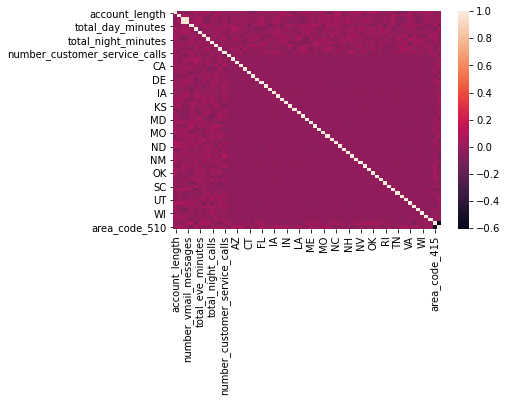

In [38]:
sns.heatmap(df_test.corr())

<AxesSubplot:>

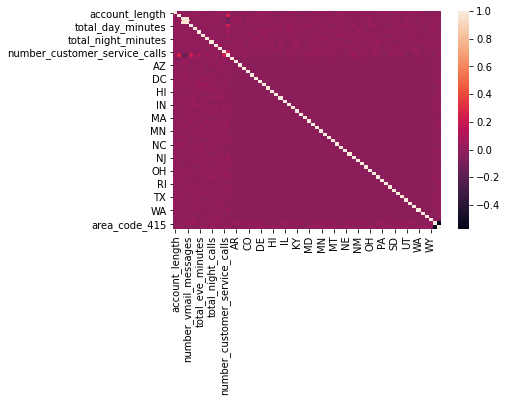

In [39]:
sns.heatmap(df_train.corr())

##### now our data is clean so we will train our model

In [40]:
# split train test data
from sklearn.model_selection import train_test_split

In [41]:
y = df_train.pop('churn')
X = df_train

In [42]:
X_train, X_validate,y_train, y_validate = train_test_split(X,y,train_size=0.7,test_size=0.3)

In [43]:
X_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
4083,106,0,0,0.0,147.7,105,215.0,129,267.2,95,...,0,0,0,0,0,0,0,0,1,0
3771,169,0,0,0.0,240.7,119,141.1,102,120.6,56,...,0,0,0,0,0,0,0,0,0,0
3191,135,0,1,38.0,202.6,92,169.6,93,185.8,108,...,0,0,0,0,0,0,0,0,0,0
3934,15,0,0,0.0,185.1,103,193.8,148,305.2,79,...,0,0,0,0,0,0,0,0,1,0
2421,141,0,1,28.0,308.0,123,247.8,128,152.9,103,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,125,0,1,34.0,268.4,112,222.2,108,117.6,102,...,0,0,0,0,0,0,0,0,0,1
3359,101,1,1,35.0,181.0,88,222.5,113,217.8,103,...,0,0,0,0,0,0,0,0,0,0
1777,106,0,0,0.0,193.6,66,238.2,82,176.4,107,...,0,0,0,0,1,0,0,0,0,0
1952,121,0,0,0.0,134.1,112,195.1,104,159.6,139,...,0,0,1,0,0,0,0,0,1,0


In [44]:
y_train.value_counts()

0    2558
1     417
Name: churn, dtype: int64

In [45]:
X_validate

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,...,TX,UT,VA,VT,WA,WI,WV,WY,area_code_415,area_code_510
2775,60,0,0,0.0,180.3,67,208.0,68,181.2,101,...,0,0,0,0,0,0,0,0,1,0
1483,93,0,1,40.0,166.9,101,273.2,84,171.0,106,...,0,0,0,0,0,0,0,1,0,0
921,116,0,1,35.0,200.4,104,272.8,89,214.5,100,...,0,0,0,0,0,1,0,0,1,0
754,149,0,0,0.0,166.6,61,218.8,107,208.3,131,...,0,0,0,0,0,0,0,0,0,1
4172,160,0,1,33.0,137.0,100,203.5,82,218.7,64,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,18,0,0,0.0,156.0,88,213.8,127,244.9,113,...,0,0,0,0,0,0,0,0,1,0
1651,73,0,0,0.0,157.1,109,268.8,83,181.5,91,...,0,0,0,0,0,1,0,0,1,0
1248,118,0,0,0.0,253.2,122,201.0,78,195.3,108,...,0,0,0,0,0,0,0,0,1,0
3883,137,0,0,0.0,109.8,112,223.5,88,247.5,96,...,0,0,0,0,0,0,0,0,0,1


### scaling on data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
#y_train_scaled = scaler.fit_transform(y_train)
X_validate_scaled = scaler.transform(X_validate)
# y_vaalidate_scaled = scaler.transform(y_validate)

In [49]:
# X_train_scaled

### train the model using logistic regression


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logr = LogisticRegression(penalty='l2',solver='saga')

In [52]:
logr.fit(X_train_scaled,y_train)

LogisticRegression(solver='saga')

In [53]:
y_pred = logr.predict(X_validate_scaled)

In [54]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
from sklearn.metrics import r2_score,mean_squared_error,precision_score,recall_score,confusion_matrix,accuracy_score

In [56]:
cfm = confusion_matrix(y_validate,y_pred)

In [57]:
print("confusion matrx : ",cfm)

confusion matrx :  [[1057   37]
 [ 137   44]]


In [58]:
print("precision score is :",precision_score(y_validate,y_pred))

precision score is : 0.5432098765432098


In [59]:
print("recall score is : ",recall_score(y_validate,y_pred))

recall score is :  0.2430939226519337


In [60]:
print("accuracy of model is :",accuracy_score(y_validate,y_pred))

accuracy of model is : 0.8635294117647059


In [61]:
y_pred1 = logr.predict(df_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
df_test.shape

(750, 65)

In [63]:
len(y_validate[y_validate==0])

1094

In [64]:
len(y_pred[y_pred==0])

1194

In [65]:
len(y_validate)

1275

In [66]:
len(y[y==0])

3652

In [67]:
len(y)

4250

## Train the model using KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knc = KNeighborsClassifier()

In [70]:
knc.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [71]:
y_pred1 = knc.predict(X_validate_scaled)

In [72]:
print("confusion matrx : ",confusion_matrix(y_validate,y_pred1))

confusion matrx :  [[1084   10]
 [ 174    7]]


In [73]:
print("accuracy of model is :",accuracy_score(y_validate,y_pred1))

accuracy of model is : 0.855686274509804


In [74]:
print("recall score is : ",recall_score(y_validate,y_pred1))

recall score is :  0.03867403314917127


In [75]:
print("precision score is :",precision_score(y_validate,y_pred1))

precision score is : 0.4117647058823529


## Train the model using SVM

In [76]:
from sklearn.svm import SVC

In [77]:
svc = SVC()

In [78]:
svc.fit(X_train_scaled,y_train)

SVC()

In [79]:
y_pred2 = svc.predict(X_validate_scaled)

In [80]:
print("confusion matrx : ",confusion_matrix(y_validate,y_pred2))

print("accuracy of model is :",accuracy_score(y_validate,y_pred2))

print("recall score is : ",recall_score(y_validate,y_pred2))

print("precision score is :",precision_score(y_validate,y_pred2))

confusion matrx :  [[1089    5]
 [ 168   13]]
accuracy of model is : 0.864313725490196
recall score is :  0.0718232044198895
precision score is : 0.7222222222222222


## Train the model using Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
nbc = GaussianNB()

nbc.fit(X_train_scaled,y_train)

y_pred3 = nbc.predict(X_validate_scaled)

print("confusion matrx : ",confusion_matrix(y_validate,y_pred3))

print("accuracy of model is :",accuracy_score(y_validate,y_pred3))

print("recall score is : ",recall_score(y_validate,y_pred3))

print("precision score is :",precision_score(y_validate,y_pred3))

confusion matrx :  [[604 490]
 [ 74 107]]
accuracy of model is : 0.5576470588235294
recall score is :  0.5911602209944752
precision score is : 0.17922948073701842


## Train the model using Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train_scaled,y_train)

y_pred4 = dtc.predict(X_validate_scaled)

print("confusion matrx : ",confusion_matrix(y_validate,y_pred4))

print("accuracy of model is :",accuracy_score(y_validate,y_pred4))

print("recall score is : ",recall_score(y_validate,y_pred4))

print("precision score is :",precision_score(y_validate,y_pred4))

confusion matrx :  [[1047   47]
 [  53  128]]
accuracy of model is : 0.9215686274509803
recall score is :  0.7071823204419889
precision score is : 0.7314285714285714


`Decision trees seem to perform pretty well with imbalanced datasets. Since they work by coming up with conditions/rules at each stage of splitting, they end up taking both classes into consideration`